In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [5]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
plt.subplots(figsize=(20,15))
# sns.heatmap(cov_matrix, annot=True, fmt='g')
sns.heatmap(corr_matrix)
plt.show()

In [18]:
train=boston.sample(frac=0.2,random_state=200)
train = train.T

In [19]:
corr_matrix = train.corr()
cov_matrix = np.cov(train,bias=True)

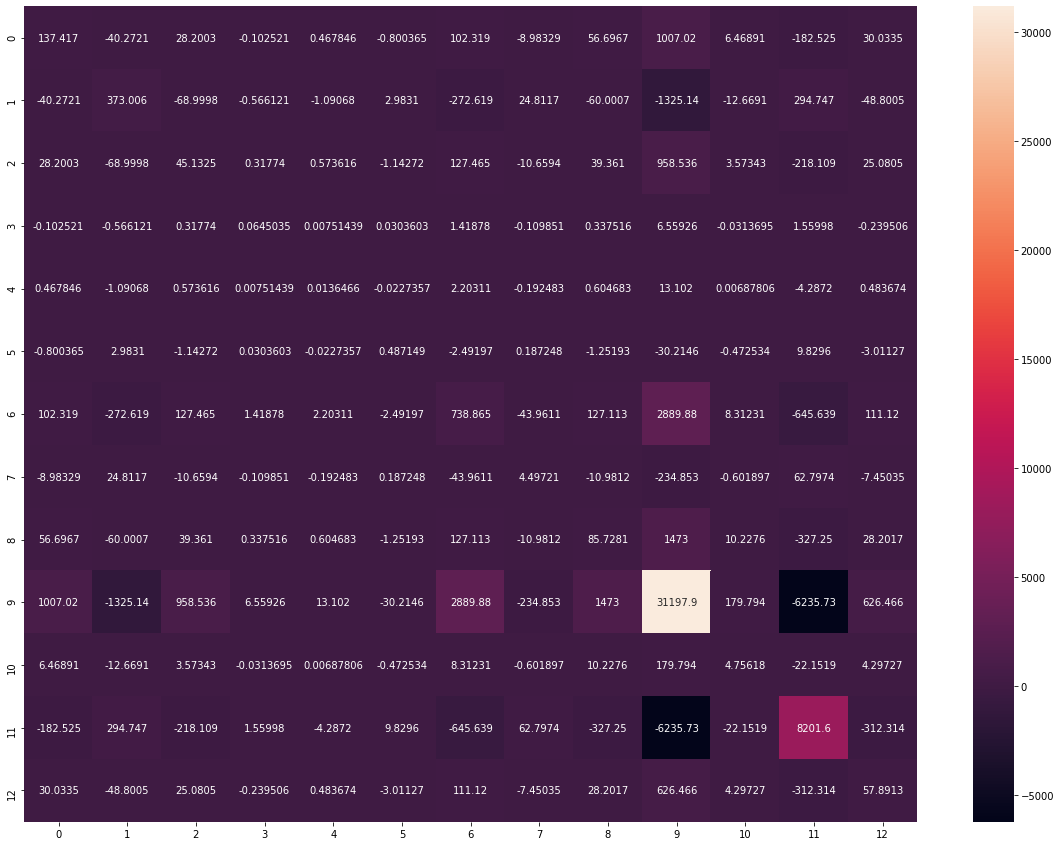

In [21]:
plt.subplots(figsize=(20,15))
sns.heatmap(cov_matrix, annot=True, fmt='g')
# sns.heatmap(cov_matrix)
plt.show()

,207,13,22,369,444,88,325,477,221,384,...,11,405,12,92,275,164,471,322,371,28
CRIM,0.25199,0.62976,1.23247,5.66998,12.8023,0.0566,0.19186,15.0234,0.40771,20.0849,...,0.11747,67.9208,0.09378,0.04203,0.09604,2.24236,4.03841,0.35114,9.2323,0.77299
ZN,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.00000,0.0000,0.00000,0.0000,...,12.50000,0.0000,12.50000,28.00000,40.00000,0.00000,0.00000,0.00000,0.0000,0.00000
INDUS,10.59000,8.14000,8.14000,18.10000,18.1000,3.4100,7.38000,18.1000,6.20000,18.1000,...,7.87000,18.1000,7.87000,15.04000,6.41000,19.58000,18.10000,7.38000,18.1000,8.14000
CHAS,0.00000,0.00000,0.00000,1.00000,0.0000,0.0000,0.00000,0.0000,1.00000,0.0000,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000
NOX,0.48900,0.53800,0.53800,0.63100,0.7400,0.4890,0.49300,0.6140,0.50700,0.7000,...,0.52400,0.6930,0.52400,0.46400,0.44700,0.60500,0.53200,0.49300,0.6310,0.53800
RM,5.78300,5.94900,6.14200,6.68300,5.8540,7.0070,6.43100,5.3040,6.16400,4.3680,...,6.00900,5.6830,5.88900,6.44200,6.85400,5.85400,6.22900,6.04100,6.2160,6.49500
AGE,72.70000,61.80000,91.70000,96.80000,96.6000,86.3000,14.70000,97.3000,91.30000,91.2000,...,82.90000,100.0000,39.00000,53.60000,42.80000,91.80000,90.70000,49.90000,100.0000,94.40000
DIS,4.35490,4.70750,3.97690,1.35670,1.8956,3.4217,5.41590,2.1007,3.04800,1.4395,...,6.22670,1.4254,5.45090,3.66590,4.26730,2.42200,3.09930,4.72110,1.1691,4.45470
RAD,4.00000,4.00000,4.00000,24.00000,24.0000,2.0000,5.00000,24.0000,8.00000,24.0000,...,5.00000,24.0000,5.00000,4.00000,4.00000,5.00000,24.00000,5.00000,24.0000,4.00000
TAX,277.00000,307.00000,307.00000,666.00000,666.0000,270.0000,287.00000,666.0000,307.00000,666.0000,...,311.00000,666.0000,311.00000,270.00000,254.00000,403.00000,666.00000,287.00000,666.0000,307.00000


In [24]:
cov_norm=np.corrcoef(cov_matrix)

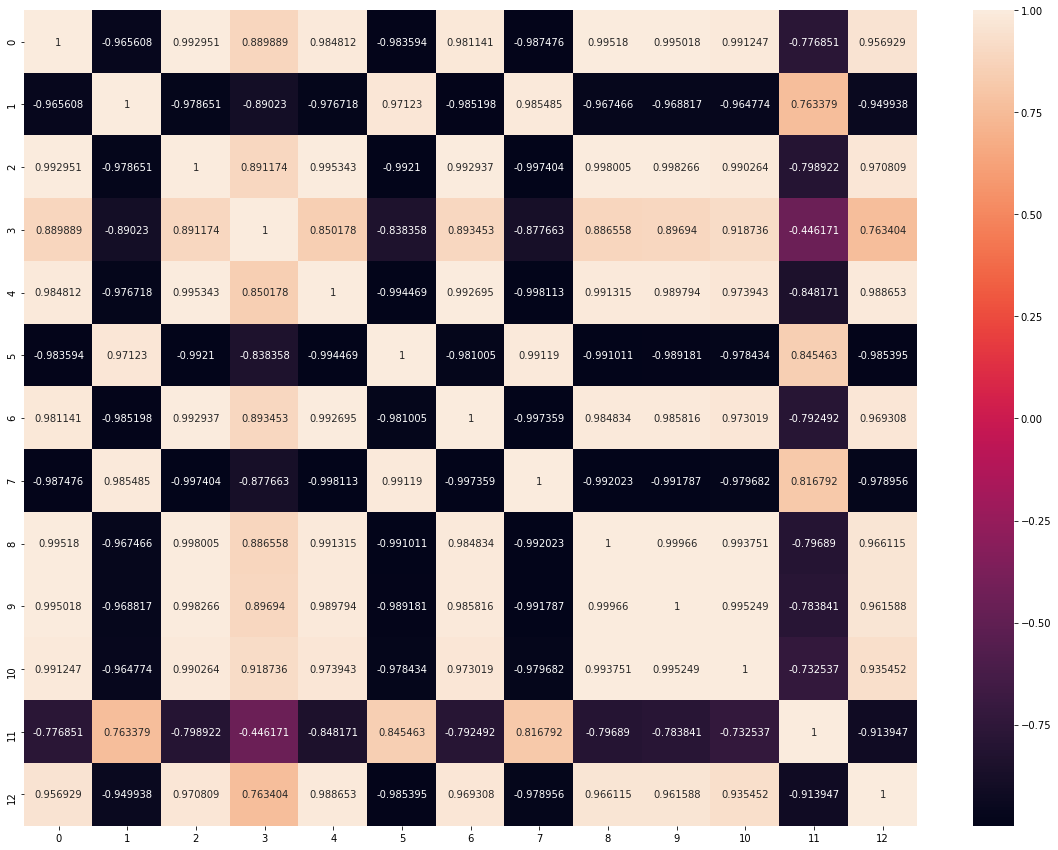

In [26]:
plt.subplots(figsize=(20,15))
sns.heatmap(cov_norm, annot=True, fmt='g')
# sns.heatmap(cov_matrix)
plt.show()